<a href="https://colab.research.google.com/github/wouffle/Text-clustering-/blob/main/Text_clustering(NPL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


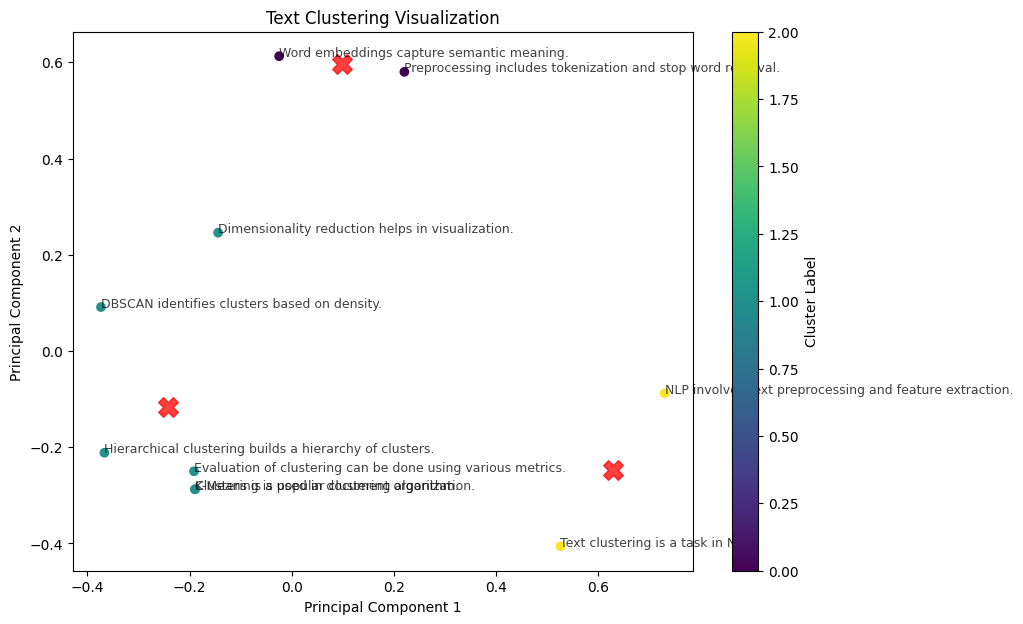

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Sample text data
documents = [
    "Text clustering is a task in NLP.",
    "NLP involves text preprocessing and feature extraction.",
    "K-Means is a popular clustering algorithm.",
    "Evaluation of clustering can be done using various metrics.",
    "Word embeddings capture semantic meaning.",
    "Hierarchical clustering builds a hierarchy of clusters.",
    "DBSCAN identifies clusters based on density.",
    "Clustering is used in document organization.",
    "Preprocessing includes tokenization and stop word removal.",
    "Dimensionality reduction helps in visualization."
]

# Step 3: Text Preprocessing and Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Step 4: Dimensionality Reduction (optional, for visualization)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

# Step 5: Clustering using K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X)

# Step 6: Visualization
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis')
plt.title("Text Clustering Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Adding cluster centers to the plot
centers = kmeans.cluster_centers_
centers_reduced = pca.transform(centers)
plt.scatter(centers_reduced[:, 0], centers_reduced[:, 1], c='red', s=200, alpha=0.75, marker='X')

# Adding labels to the plot
for i, txt in enumerate(documents):
    plt.annotate(txt, (X_reduced[i, 0], X_reduced[i, 1]), fontsize=9, alpha=0.75)

plt.colorbar(scatter, label='Cluster Label')
plt.show()
